# Iris Species Classification: An Exploration of Machine Learning

**Overview**: In the realm of data science, classification problems serve as a cornerstone for understanding patterns within data and predicting outcomes. This project presents a comprehensive journey through Exploratory Data Analysis (EDA) and the development of a machine learning model to classify Iris species, a classic dataset in the field. The Iris dataset, with its simplicity and clear differentiation among classes, provides an excellent opportunity for beginners and seasoned practitioners alike to hone their skills in machine learning and data visualization.
Project Overview

**Method**: Our project kicks off with a thorough EDA, where we dive into the Iris dataset to unravel the relationships between different features such as sepal length, sepal width, petal length, and petal width. Using statistical analysis and visualization techniques, we uncover insights that not only inform the audience but also guide the subsequent modeling phase.

**Model**: Transitioning to the core of our project, we employ the RandomForestClassifier, a robust ensemble learning method, to predict the species of Iris flowers. Through careful model training, parameter tuning via grid search, and cross-validation, we aim to achieve a model that not only performs with high accuracy but also generalizes well to unseen data.

**Significance**: The Iris classification problem, although historical, remains relevant as it encapsulates the essential steps of a machine learning workflow within a manageable scope. This project serves as a microcosm of the larger data science methodology, encapsulating the iterative nature of feature engineering, model selection, and evaluation.

By documenting each step in this notebook, we offer a narrative not just of the analytical strategies employed but also of the thought process behind each decision. It is a testament to the iterative and exploratory nature of data science, showcasing the synergy between human intuition and algorithmic precision.

## Initialization

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
%matplotlib inline
sns.set_style('darkgrid')

# Import data and create data frame
df = sns.load_dataset('iris')

# Preview the top rows of the dataset
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Returns value counts and data type of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 With no missing data this dataset is ready for analysis.

## EDA

In [4]:
# Average sepal length greatly varies across species
df.groupby('species')['sepal_length'].mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

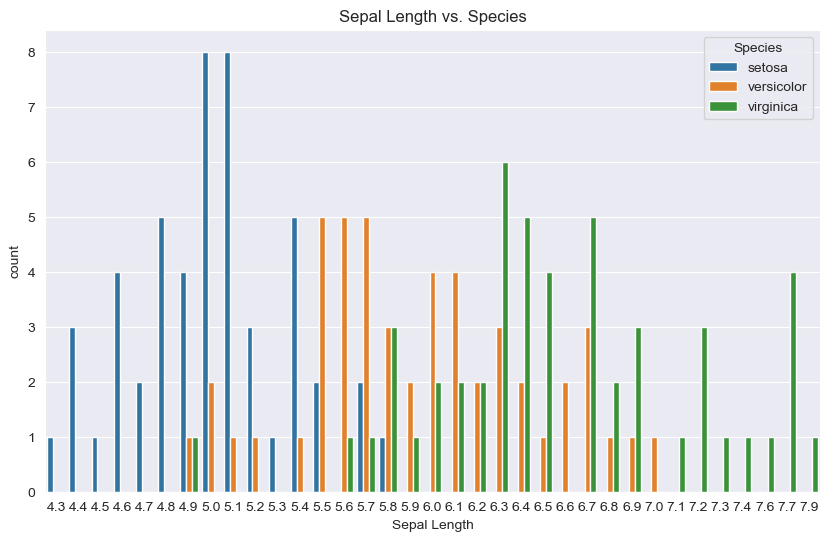

In [6]:
# Chart displaying average sepal length by species

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.countplot(x='sepal_length', data=df, hue='species');

# Customize the plot
plt.title('Sepal Length vs. Species')
plt.xlabel('Sepal Length')
plt.legend(title='Species')

# Display the plot
plt.show()

In [8]:
# Average sepal width greatly varies across species
df.groupby('species')['sepal_width'].mean()

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64

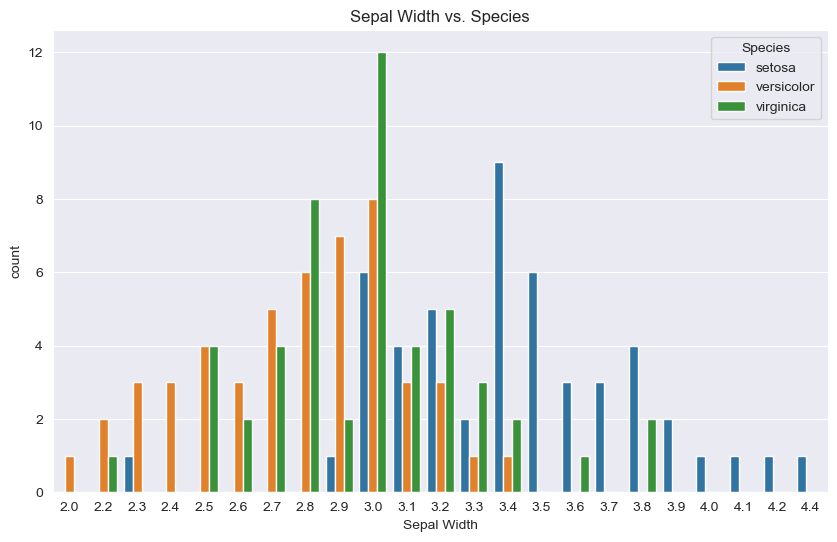

In [7]:
# Chart displaying average sepal width by species

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart 
sns.countplot(x='sepal_width', data=df, hue='species');

# Customize the plot
plt.title('Sepal Width vs. Species')
plt.xlabel('Sepal Width')
plt.legend(title='Species')

# Display the plot
plt.show()

In [8]:
# Average petal length greatly varies across species
df.groupby('species')['petal_length'].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

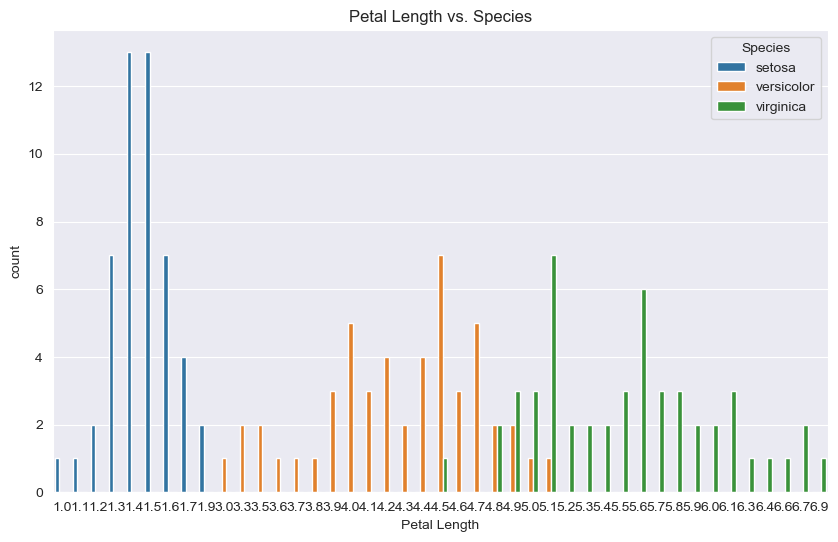

In [9]:
# Chart displaying average petal length by species

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart 
sns.countplot(x='petal_length', data=df, hue='species');

# Customize the plot
plt.title('Petal Length vs. Species')
plt.xlabel('Petal Length')
plt.legend(title='Species')

# Display the plot
plt.show()

In [10]:
# Average petal length width varies across species
df.groupby('species')['petal_width'].mean()

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

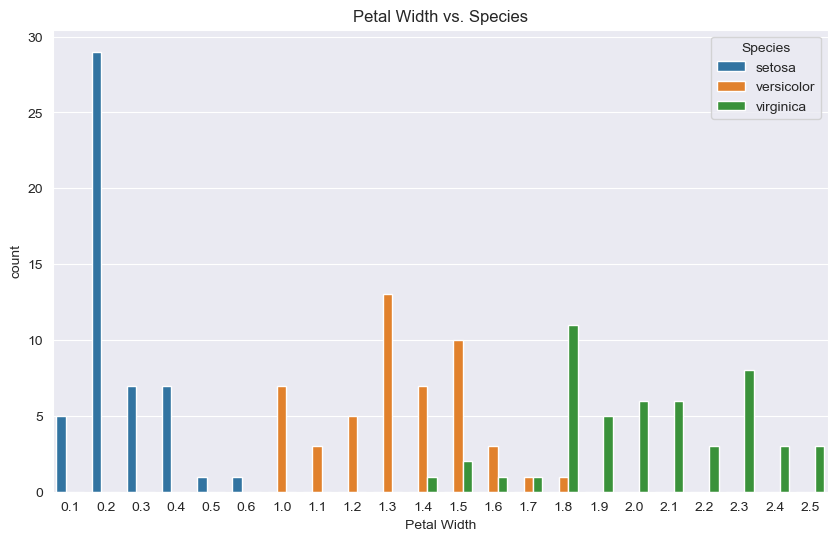

In [11]:
# Chart displaying average petal width by species

# Create the plot
plt.figure(figsize=(10, 6))

# Create a bar chart 
sns.countplot(x='petal_width', data=df, hue='species');

# Customize the plot
plt.title('Petal Width vs. Species')
plt.xlabel('Petal Width')
plt.legend(title='Species')

# Display the plot
plt.show()

## Machine Learning Model

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Feature Engineering

In [13]:
# Create Ratios for Petal Length / Width & Sepal Length / Width

df['petal_lw_ratio'] = df['petal_length'] / df['petal_width']

df['sepal_lw_ratio'] = df['sepal_length'] / df['sepal_width']

# Create Ratios Between Petal Length and Sepal Length & Petal Width / Sepal Width

df['petal_sepal_length_ratio'] = df['petal_length'] / df['sepal_length']
df['petal_sepal_width_ratio'] = df['petal_width'] / df['sepal_width']

In [14]:
# View unique categories of species and their value counts
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [15]:
# Map the species in numeric form for machine learning model
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

### Random Forest Classifier

In [16]:
# Import train test split
from sklearn.model_selection import train_test_split

# Create variables
X = df.drop('species', axis = 1)
y = df['species']

# Split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Create the machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Fit the data to the model
clf.fit(X_train, y_train);

In [18]:
clf.score(X_test, y_test)

0.9333333333333333

### Improve the Model

In [19]:
# We can imporve the model using a grid search to select the best model from a series
from sklearn.model_selection import GridSearchCV

# Create the classifier
clf = RandomForestClassifier()

# Create a parameter grid
param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8]
}

# Create a grid search to find the best model with the given parameters
grid_search = GridSearchCV(clf, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score=True)

# Fit the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [20]:
# Create a variable to store the best model
best_model = grid_search.best_estimator_

In [21]:
best_model.score(X_test, y_test)

0.9333333333333333

### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a k-fold cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=kf)

# The cv_scores contains an array of k validation scores
cv_scores

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 0.9       ])

In [23]:
# Analyze the results
mean_score = cv_scores.mean()
std_deviation = cv_scores.std()

print(f'Mean cross-validation score: {mean_score:.2f}')
print(f'Standard deviation of cross-validation score: {std_deviation:.2f}')

Mean cross-validation score: 0.95
Standard deviation of cross-validation score: 0.03


# Conclusion of Iris Species Classification Project

Our journey through the Iris Classification project has led us to an in-depth understanding of not only the data at hand but also the intricate process of machine learning. We embarked on this path with a simple yet thorough exploratory data analysis (EDA), which set the stage for our feature engineering endeavors and provided a solid foundation for the subsequent modeling.

As we delved into the modeling phase, we employed a RandomForestClassifier, known for its robustness and versatility. The model was fine-tuned using GridSearchCV, which meticulously searched through a range of hyperparameters to find the best combination that maximizes model performance. This optimization process was crucial as it helped us identify the most impactful parameters, ensuring that our model is not only accurate but also efficient.

The cross-validation results are particularly encouraging, with the model achieving an average score of 0.95 and a standard deviation of 0.03 in its predictive accuracy across different subsets of the data. This high mean score indicates that our model is quite precise in classifying the Iris species, while the low standard deviation suggests that the model's performance is consistent and reliable across different data splits.

Ultimately, these performance metrics validate the effectiveness of our feature engineering and hyperparameter optimization steps. The project showcases a successful machine learning workflow, from data preprocessing to model evaluation, underpinning the importance of each step in the pipeline.

This Iris Classification project serves not only as a testament to the power of machine learning in biological classification tasks but also as a blueprint for methodical and data-driven problem-solving. As we conclude, we can confidently say that the model we've built is well-equipped to classify Iris species with high accuracy, providing valuable insights and serving as a stepping stone for further research in the field.